# **2. Data Wrangling**

As a reminder, this project aims to forecast the air quality of Boston in 2022 and 2023. This notebook focuses on explaning, cleaning, and organizing of datasets of the project. I start with importing the necessary libraries. 

In [56]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from google.colab import files

## **2.1 Datasets**

In the project, there are several data related with the air quality. These are weather, population, different types of energy consumption, flight number datasets. 

### **2.1.1 Air Quality**

The first data is about air quality of Boston. The data was downloaded from [here](https://aqicn.org/data-platform/register/). There are five parameters: PM25, O3, NO2, SO2, CO. According to World Health Organization ([2022](https://https://www.who.int/news-room/fact-sheets/detail/ambient-(outdoor)-air-quality-and-health)), the details of parameters are explained below.

**Particulate matter/particles(PM):** PM, the common proxy indicator for air pollution, affects human health more than other pollutants. 
Atmospheric particulate matter, or fine particles, are tiny particles of solid or liquid suspended in a gas. 

**Ground level ozone (O3):** Ozone at ground level is one of the major constituents of photochemical smog. Extreme ozone in the air can cause effects on human health as breathing problems, trigger asthma. 

**Nitrogen dioxide (NO2):** NO2 is the main source of nitrate aerosols, which form an important fraction of PM2.5 and, in the presence of ultraviolet light, of ozone. Researches have shown that long-term exposure to NO2 can cause bronchitis in asthmatic children.

**Sulphur dioxide (SO2):** SO2, a colourless gas with a sharp odour, is produced from the burning of fossil fuels (coal and oil). SO2 can affect the humans' respiratory system and the lungs function.

**Carbon monoxide (CO):** CO is a colorless, odorless, toxic gas. It is a product of combustion of fuel such as natural gas, coal or wood. 

In [3]:
# Load the data
url = 'https://github.com/hangulde/Springboard/raw/main/Capstone%202/dataset_data_wrangling/boston-air-quality.csv'
air_quality = pd.read_csv(url)

In [ ]:
air_quality.head() #I have 5 parameters.

,date,pm25,o3,no2,so2,co
0,2022/3/2,43,31,17,1,3
1,2022/3/3,43,28,13,1,3
2,2022/3/4,33,28,13,,2
3,2022/3/5,24,33,12,1,2
4,2022/3/6,35,24,16,,2


In [ ]:
# Check the column names.
air_quality.columns #The first character of column names is space. Delete them.

Index(['date', ' pm25', ' o3', ' no2', ' so2', ' co'], dtype='object')

In [ ]:
# Edit column names
air_quality.columns= air_quality.columns.str[1:] #delete the first space. There is problem with 'date' column.
air_quality.columns

Index(['ate', 'pm25', 'o3', 'no2', 'so2', 'co'], dtype='object')

In [ ]:
# Rename column names
air_quality = air_quality.rename({'ate':'date'}, axis=1) # correct the column name
air_quality.columns

Index(['date', 'pm25', 'o3', 'no2', 'so2', 'co'], dtype='object')

In [ ]:
# Check the types of features.
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2970 entries, 0 to 2969
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    2970 non-null   object
 1   pm25    2970 non-null   object
 2   o3      2970 non-null   object
 3   no2     2970 non-null   object
 4   so2     2970 non-null   object
 5   co      2970 non-null   object
dtypes: object(6)
memory usage: 139.3+ KB


In [ ]:
# Convert the date column to datetime
air_quality['date'] = pd.to_datetime(air_quality['date'], format="%Y-%m-%d")
air_quality.info() 
#pd.to_numeric() doesn't work. I convert to float on forward cells.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2970 entries, 0 to 2969
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2970 non-null   datetime64[ns]
 1   pm25    2970 non-null   object        
 2   o3      2970 non-null   object        
 3   no2     2970 non-null   object        
 4   so2     2970 non-null   object        
 5   co      2970 non-null   object        
dtypes: datetime64[ns](1), object(5)
memory usage: 139.3+ KB


In [ ]:
# I realised that some dates are missing. I can see these dates are gray on website. These days are not included on csv. 
# For example there is no data for March 31th.
air_quality[air_quality.date == '2020-03-31']

,date,pm25,o3,no2,so2,co


In [ ]:
#I decided to create a df for all dates from 2014-01-01 to 2022-02-28
start = datetime.datetime.strptime("2014-01-01", "%Y-%m-%d")
end = datetime.datetime.strptime("2022-03-01", "%Y-%m-%d")
date_df = pd.DataFrame({'date':[start + datetime.timedelta(days=x) for x in range(0, (end-start).days)]})
date_df

,date
0,2014-01-01
1,2014-01-02
2,2014-01-03
3,2014-01-04
4,2014-01-05
...,...
2976,2022-02-24
2977,2022-02-25
2978,2022-02-26
2979,2022-02-27


In [ ]:
#I merge two dfs.
air_quality_2 = pd.merge(date_df, air_quality, how='left', on='date')
#check the same date. It is on df now and values are NaN
air_quality_2[air_quality_2.date == '2020-03-31']

,date,pm25,o3,no2,so2,co
2281,2020-03-31,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Check the df again.
air_quality_2.head() 
#there are some space cells. 

,date,pm25,o3,no2,so2,co
0,2014-01-01,,23,,,
1,2014-01-02,47,14,,,
2,2014-01-03,45,21,,,
3,2014-01-04,38,23,,,
4,2014-01-05,54,12,,,


In [ ]:
# Replace spaces to NaNs
air_quality_2 = air_quality_2.replace(r'^\s+$', np.nan, regex=True)
air_quality_2.head()

,date,pm25,o3,no2,so2,co
0,2014-01-01,NaN,23,NaN,NaN,NaN
1,2014-01-02,47,14,NaN,NaN,NaN
2,2014-01-03,45,21,NaN,NaN,NaN
3,2014-01-04,38,23,NaN,NaN,NaN
4,2014-01-05,54,12,NaN,NaN,NaN


In [ ]:
# Sort the date
air_quality_2 = air_quality_2.sort_values(by=['date'], ascending=False)

In [ ]:
air_quality_2=air_quality_2.reset_index(drop=True)

In [ ]:
#Set index as date column. It will better while creating time series plots.
air_quality_2 = air_quality_2.set_index('date')

In [ ]:
air_quality_2 = air_quality_2.astype(str).astype(float)


In [ ]:
# The NaNs in the data set.
air_quality_2.isna().sum()


pm25      41
o3        43
no2      406
so2     1845
co       423
dtype: int64

In [ ]:
# Fill NaN with interpolate method.
air_quality_2.interpolate(method='linear', inplace=True) 

In [ ]:
air_quality_2.head()

,pm25,o3,no2,so2,co
date,,,,,
2022-02-28,45.0,28.0,14.0,1.0,2.0
2022-02-27,39.0,34.0,12.0,1.0,3.0
2022-02-26,27.0,29.0,18.0,1.0,4.0
2022-02-25,21.0,22.0,13.0,1.0,2.0
2022-02-24,31.0,23.0,14.0,1.0,2.0


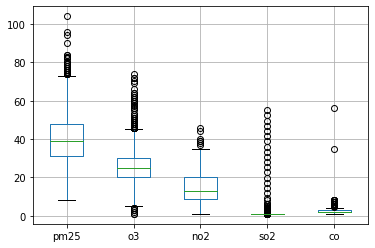

In [ ]:
#Check outliers. I can see there are a lot of outliers. I don't drop them. "Identifying outliers in time series forecasting is important because outliers influence the forecast model that is used to 
#forecast future values. I will examine the outliers in EDA.
air_quality_2.boxplot() 

In [ ]:
# I realised that my yearly datasets' date range ends in 2021. I don't have 2022 data. So I dediced to drop two months of 2022. 
air_quality_2 = air_quality_2.loc[:'2021-12-31']

In [ ]:
#Last check before saving
air_quality_2

,pm25,o3,no2,so2,co
date,,,,,
2021-12-31,52.0,4.0,18.0,1.0,5.0
2021-12-30,42.0,2.0,23.0,1.0,5.0
2021-12-29,40.0,9.0,15.0,1.0,4.0
2021-12-28,27.0,12.0,15.0,1.0,4.0
2021-12-27,26.0,13.0,13.0,1.0,3.0
...,...,...,...,...,...
2014-01-05,54.0,12.0,29.0,1.0,5.0
2014-01-04,38.0,23.0,29.0,1.0,5.0
2014-01-03,45.0,21.0,29.0,1.0,5.0


In [ ]:
#Save the clean version of air_quality
air_quality_2.to_csv('air_quality_eda.csv', encoding = 'utf-8-sig') 
files.download('air_quality_eda.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **2.2.2 Weather**

The second dataset is about Boston's weather. There are a lot of attributes of weather data.The data range is between 01/01/2014 and 03/22/2022. The data was downloaded from [here](https://www.visualcrossing.com/weather/weather-data-services).

In [ ]:
# Load the data
url_w = 'https://github.com/hangulde/Springboard/raw/main/Capstone%202/dataset_data_wrangling/weather.csv'
weather = pd.read_csv(url_w)

In [ ]:
# Check the df
weather.head()

,index,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,0,boston,2014-01-01,-2.1,-7.0,-4.7,-6.6,-13.3,-10.0,-15.1,...,NaN,0,NaN,2014-01-01T07:13:34,2014-01-01T16:22:19,0.00,Partially cloudy,Becoming cloudy in the afternoon.,partly-cloudy-day,"KOWD,72509854704,KMQE,KBOS,72509014739,7250591..."
1,1,boston,2014-01-02,-3.3,-16.1,-8.4,-9.6,-28.2,-16.6,-11.3,...,NaN,0,NaN,2014-01-02T07:13:38,2014-01-02T16:23:12,0.01,"Snow, Overcast",Cloudy skies throughout the day with a chance ...,snow,"KOWD,72509854704,KMQE,KBOS,72509014739,7250591..."
2,2,boston,2014-01-03,-10.0,-17.0,-14.4,-18.0,-29.8,-24.9,-20.0,...,NaN,0,NaN,2014-01-03T07:13:39,2014-01-03T16:24:07,0.03,"Snow, Partially cloudy",Partly cloudy throughout the day with rain cle...,snow,"KOWD,72509854704,KMQE,KBOS,72509014739,7250591..."
3,3,boston,2014-01-04,-3.0,-17.2,-9.7,-9.3,-25.4,-16.5,-17.5,...,NaN,0,NaN,2014-01-04T07:13:38,2014-01-04T16:25:03,0.07,"Snow, Partially cloudy",Partly cloudy throughout the day with morning ...,snow,"KOWD,72509854704,KMQE,KBOS,72509014739,7250591..."
4,4,boston,2014-01-05,3.0,-4.4,-0.7,2.0,-10.5,-4.7,-5.9,...,NaN,0,NaN,2014-01-05T07:13:35,2014-01-05T16:26:00,0.11,"Snow, Partially cloudy",Partly cloudy throughout the day with late aft...,snow,"KOWD,72509854704,KMQE,KBOS,72509014739,7250591..."


In [ ]:
#Shape of df
weather.shape

(3003, 34)

There are 34 columns. I want to see in detail. The explanations of columns [here](https://www.visualcrossing.com/resources/documentation/weather-data/weather-data-documentation/). I will drop some of columns which are useless.

In [ ]:
# Column names
weather.columns

Index(['index', 'name', 'datetime', 'tempmax', 'tempmin', 'temp',
       'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity',
       'precip', 'precipprob', 'precipcover', 'preciptype', 'snow',
       'snowdepth', 'windgust', 'windspeed', 'winddir', 'sealevelpressure',
       'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex',
       'severerisk', 'sunrise', 'sunset', 'moonphase', 'conditions',
       'description', 'icon', 'stations'],
      dtype='object')

**What do effect air quality?**
The weather can have a significant impact on air quality since different aspects of the weather affect the amounts of ozone and particulates that are present in a specific area.  Sunshine, rain, higher temperatures, wind speed, air turbulence, and mixing depths all affect pollutant concentrations.

In [ ]:
# Make a list of the useless columns.
drop_col = ['index' #I set index as date]
            ,'name' #all of them Boston
            ,'sunrise',	'sunset' #I don't use daytime
            ,'moonphase' #I think it is irrelevant
            , 'conditions' # I use icon column instead of conditions. Less categorr
            , 'stations' #the id of locations.
            , 'severerisk' #more than 2900 NaNs
            , 'uvindex' #more than 2900 NaNs
            , 'solarenergy' #more than 2900 NaNs
            , 'solarradiation' #more than 2900 NaNs
            , 'description' #63 category. I use icon
            , 'preciptype' # 39 non-null  
            , 'precipprob' # 72 non-null
            ]

In [ ]:
# Drop useless columns
weather = weather.drop(drop_col, axis=1)
weather.columns

Index(['datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipcover',
       'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'visibility', 'icon'],
      dtype='object')

In [ ]:
# See the types of columns
weather.info()
#Change the name and type of date column type
#Change the type of icon column type. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3003 entries, 0 to 3002
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   datetime          3003 non-null   object 
 1   tempmax           3003 non-null   float64
 2   tempmin           3003 non-null   float64
 3   temp              3003 non-null   float64
 4   feelslikemax      3003 non-null   float64
 5   feelslikemin      3003 non-null   float64
 6   feelslike         3003 non-null   float64
 7   dew               3003 non-null   float64
 8   humidity          3003 non-null   float64
 9   precip            3003 non-null   float64
 10  precipcover       2931 non-null   float64
 11  snow              2273 non-null   float64
 12  snowdepth         2273 non-null   float64
 13  windgust          2601 non-null   float64
 14  windspeed         3003 non-null   float64
 15  winddir           3003 non-null   float64
 16  sealevelpressure  3003 non-null   float64


In [ ]:
# Change datetime column to datetype
weather = weather.rename(columns={"datetime":"date"})

In [ ]:
# Make date format similar to air quality.
weather.date = pd.to_datetime(weather['date'], format="%Y-%m-%d")

In [ ]:
# Sort the dates descending order.
weather = weather.sort_values(by=['date'], ascending=False)

In [ ]:
# Set the date as index for dataframe
weather = weather.set_index('date')

In [ ]:
# Change the type of column column. 
weather.icon = weather.icon.astype('category')
weather.icon.value_counts()

partly-cloudy-day    1032
rain                 1022
wind                  472
snow                  338
clear-day              93
cloudy                 46
Name: icon, dtype: int64

In [ ]:
# Check df
weather.head()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipcover,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,icon
date,,,,,,,,,,,,,,,,,,,
2022-03-22,7.3,-1.5,2.0,6.5,-5.6,-0.6,-5.2,60.7,0.0,NaN,0.0,0.1,27.0,11.9,60.3,1027.0,21.6,24.1,partly-cloudy-day
2022-03-21,2.8,-0.1,1.0,-1.8,-4.3,-3.4,-4.1,68.9,0.5,NaN,0.0,0.2,35.0,20.2,51.7,1030.6,96.9,21.2,cloudy
2022-03-20,16.3,0.4,6.0,16.3,-4.0,2.9,3.8,86.1,12.9,NaN,0.4,0.1,52.0,25.2,92.7,1020.0,100.0,16.7,snow
2022-03-19,21.9,8.2,16.2,21.9,6.9,16.1,10.8,71.5,0.0,NaN,0.0,0.0,58.7,19.8,215.6,1015.8,100.0,24.1,rain
2022-03-18,15.4,7.0,9.6,15.4,5.2,8.9,6.0,79.0,0.0,NaN,0.0,0.0,19.1,14.4,125.2,1021.1,74.2,24.1,partly-cloudy-day


In [ ]:
# Make a list of the days that should be deleted
from datetime import date, datetime, timedelta

def perdelta(start, end, delta):
    curr = start
    while curr < end:
        yield curr
        curr += delta
delete_day = []
for result in perdelta(date(2022, 3, 1), date(2022, 3, 23), timedelta(days=1)):
  delete_day.append(result)

In [ ]:
# Delete the listed rows 
weather = weather.drop(delete_day)

In [ ]:
# Check date range is similar for two data sets
print('Air quality index length:', len(air_quality_2))
print('Weather index length:', len(weather))
print('')
#Check duplicates
print('# of duplicates:', pd.Index(weather).duplicated().sum())
# pd.Index(air_quality_2).duplicated().sum() ## DOESN'T WORK
print('')
#Check max and min
print('Air quality max and min:' , air_quality_2.index.max(), air_quality_2.index.min())
print('Weather max and min:' , weather.index.max(), weather.index.min())

Air quality index length: 2922
Weather index length: 2981

# of duplicates: 0

Air quality max and min: 2021-12-31 00:00:00 2014-01-01 00:00:00
Weather max and min: 2022-02-28 00:00:00 2014-01-01 00:00:00


In [ ]:
# Check NaNs
weather.isna().sum()

tempmax               0
tempmin               0
temp                  0
feelslikemax          0
feelslikemin          0
feelslike             0
dew                   0
humidity              0
precip                0
precipcover          50
snow                730
snowdepth           730
windgust            402
windspeed             0
winddir               0
sealevelpressure      0
cloudcover            0
visibility            0
icon                  0
dtype: int64

In [ ]:
# Fill NaNs
weather.precipcover.interpolate(method='linear', inplace=True)
weather.snow.interpolate(method='linear', inplace=True)
weather.snowdepth.interpolate(method='linear', inplace=True)
weather.windgust.interpolate(method='linear', inplace=True)

In [ ]:
# As in air quality, I have to drop firsr two months of 2022.
weather=weather.loc[:'2021-12-31']


In [ ]:
# Save the dataframe as csv
from google.colab import files

weather.to_csv('weather_eda.csv', encoding = 'utf-8-sig') 
files.download('weather_eda.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **2.2.3 Energy Consumption**

There are two monthly and state level consumption data. 
1. The Natural Gas Delivered to Consumers in Massachusetts (Including Vehicle Fuel) (Million Cubic Feet)
2. Massachusetts Total Gasoline All Sales per Deliveries by Prime_Supplier

In [60]:
# Load datasets. 
url_3= 'https://github.com/hangulde/Springboard/raw/main/Capstone%202/dataset_data_wrangling/Natural_Gas_Delivered_to_Consumers_in_Massachusetts_(Including_Vehicle_Fuel).csv'
nat_gas_cons=pd.read_csv(url_3)
url_4 = 'https://github.com/hangulde/Springboard/raw/main/Capstone%202/dataset_data_wrangling/Massachusetts_Total_Gasoline_All_Sales_per_Deliveries_by_Prime_Supplier.csv'
gas_sales=pd.read_csv(url_4)

In [61]:
# Check the types of columns
nat_gas_cons.info() # Convert the type of date column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    252 non-null    object
 1    Total  252 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.1+ KB


In [62]:
# Check the types of columns
gas_sales.info()
#There are more rows in gas_sales.Delete rows.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    468 non-null    object 
 1    Total  468 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.4+ KB


In [63]:
# Choose the date after January 2014
gas_sales = gas_sales[:96]
gas_sales.tail()

,Date,Total
91,May 2014,6306.7
92,Apr 2014,6054.7
93,Mar 2014,5842.3
94,Feb 2014,5837.5
95,Jan 2014,5561.6


In [64]:
# Choose the date after January 2014
nat_gas_cons = nat_gas_cons[:96]
nat_gas_cons.tail()

,Date,Total
91,May 2014,27292
92,Apr 2014,38084
93,Mar 2014,44694
94,Feb 2014,47769
95,Jan 2014,53771


In [65]:
# Rename total columns for both
nat_gas_cons = nat_gas_cons.rename(columns = {' Total':'natural_gas', 'Date':'date' })
gas_sales = gas_sales.rename(columns = {' Total':'gasoline_sales', 'Date':'date' })

In [66]:
# Merge two datasets
energy = nat_gas_cons.merge(gas_sales, on='date', how='inner')
energy.head()

,date,natural_gas,gasoline_sales
0,Dec 2021,43172,5828.2
1,Nov 2021,31786,5942.2
2,Oct 2021,21723,6085.1
3,Sep 2021,17929,6033.1
4,Aug 2021,22065,6086.5


In [67]:
# Split date column
new = energy["date"].str.split(" ", n = 1, expand = True)
  
# Making separate first name column from new data frame
energy["month"]= new[0]
  
# Making separate last name column from new data frame
energy["year"]= new[1]
  

In [68]:
# Drop old date columsn
energy.drop(columns =["date"], inplace = True)

In [69]:
# Change month column as number
d = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May': 5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12 }

energy.month = energy.month.map(d)

In [70]:
# Change the type of month
energy.month = energy.month.astype(str) # To add year (str) convert string

In [71]:
# Create date column
energy['date'] = energy['year'] +' ' + energy['month']

In [72]:
# Change the type of date column
energy.date = pd.to_datetime(energy.date, format="%Y-%m")
#convert date column to datetime

In [73]:
# Drop month and year column
energy = energy.drop(['month', 'year'], axis=1)

In [74]:
# Check NaNs
energy.info()
#No NaNs

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 0 to 95
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   natural_gas     96 non-null     int64         
 1   gasoline_sales  96 non-null     float64       
 2   date            96 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 3.0 KB


In [75]:
# Save the clean version
energy.to_csv('energy_eda.csv', encoding = 'utf-8-sig') 
files.download('energy_eda.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### 2.2.4 Flight Number of Boston

This dataset contains of Logan Airport's (Boston) number of  total airport flight operations. Monthly data is gathered from [here](https://www.massport.com/logan-airport/about-logan/airport-statistics/). 

In [ ]:
# load data
url_f ='https://github.com/hangulde/Springboard/raw/main/Capstone%202/dataset_data_wrangling/Boston%20Flights%20-%20Sheet1.csv'
flight = pd.read_csv(url_f)

In [ ]:
# Look over data
flight.head()

,date,Unnamed: 1
0,02-01-2022,NaN
1,01-01-2022,24095.0
2,12-01-2021,27285.0
3,11-01-2021,28315.0
4,10-01-2021,28780.0


In [ ]:
# Rename columns
flight.rename( columns={'Unnamed: 1':'flight_number'}, inplace=True )

In [ ]:
# Types of columns
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           98 non-null     object 
 1   flight_number  97 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [ ]:
# Drop 2022 data
flight = flight[2:]

In [ ]:
# Convert object to datetime
flight.date= pd.to_datetime(flight.date)

In [ ]:
# Check types again.
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 2 to 97
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           96 non-null     datetime64[ns]
 1   flight_number  96 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.6 KB


{'boxes': [<matplotlib.lines.Line2D at 0x7f7761401190>],
 'caps': [<matplotlib.lines.Line2D at 0x7f7761403d90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f77613d7d50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f77614032d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f77614017d0>,
  <matplotlib.lines.Line2D at 0x7f7761401d10>]}

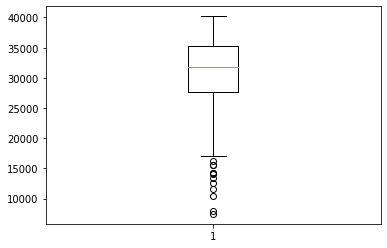

In [ ]:
#  Check the outliers
plt.boxplot(x=flight.flight_number)
# These outliers from covid restrictions time

In [ ]:
# Save the clean version
flight.to_csv('flights_eda.csv', encoding = 'utf-8-sig') 
files.download('flights_eda.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **2.2.5 Population of Boston**

I can not use Cencus Breaus data because there is no data for 2021. The population of Boston taken from [here](https://worldpopulationreview.com/us-cities/boston-ma-population)). 2021 and 2022 data is projected. 

In [ ]:
# Load the data
population = pd.read_csv('https://github.com/hangulde/Springboard/raw/main/Capstone%202/dataset_data_wrangling/population%20of%20boston.csv')
population.head()

,Year,Population,Growth,GrowthRate
0,2022,696959,1453,0.0021
1,2021,695506,1453,0.0021
2,2020,694053,1453,0.0021
3,2019,692600,1453,0.0021
4,2018,691147,3359,0.0049


In [ ]:
# Drop useless years
population=population[(population['Year']>2013) & (population['Year']<2022)]


In [ ]:
population
# Everything seems ok

,Year,Population,Growth,GrowthRate
1,2021,695506,1453,0.0021
2,2020,694053,1453,0.0021
3,2019,692600,1453,0.0021
4,2018,691147,3359,0.0049
5,2017,687788,7940,0.0117
6,2016,679848,9357,0.0140
7,2015,670491,7636,0.0115
8,2014,662855,9853,0.0151


In [ ]:
# Save the clean version
population.to_csv('population_eda.csv', encoding = 'utf-8-sig') 
files.download('population_eda.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **2.2.6 Federal Highway Administration's Reports**

Office of Highway Policy Information publishes reports containing analyzed statistical information on traffic as motor fuel, highway mileage, travel etc. [Traffic Volume Trends](https://www.fhwa.dot.gov/policyinformation/travel_monitoring/tvt.cfm) is one of them which is a monthly report based on hourly traffic count data reported by the States. In this dataset, estimated travel (in billion vehicle-miles) on all roads and streets in Massachusetts are reported. In an another report, the amount of gallons taxed by that state is collected.


In [38]:
# Load the data
url_t = 'https://github.com/hangulde/Springboard/raw/main/Capstone%202/dataset_data_wrangling/traffic%20statistics.csv'
traffic = pd.read_csv(url_t)

In [39]:
# Look over the data
traffic.head()

,date,total,special fuel,gasoline,Vehicle-Miles
0,2021-12-01,NaN,NaN,NaN,5260
1,2021-11-01,242875383.0,38099539.0,204775844.0,5156
2,2021-10-01,267412325.0,41370369.0,226041956.0,5543
3,2021-09-01,259284840.0,37847254.0,221437586.0,5120
4,2021-08-01,261347939.0,39981448.0,221366491.0,5340


In [40]:
traffic.info()
# December 2021 data wasn't reported. I add the average of 2021 to December 2021.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           96 non-null     object 
 1   total          95 non-null     float64
 2   special fuel   95 non-null     float64
 3   gasoline       95 non-null     float64
 4   Vehicle-Miles  96 non-null     int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 3.9+ KB


In [52]:
traffic.head()

,date,fuel_and_gas_total,special_fuel,gasoline,vehicle-miles
0,2021-12-01,246228117.0,37352085.0,208876032.0,5260
1,2021-11-01,242875383.0,38099539.0,204775844.0,5156
2,2021-10-01,267412325.0,41370369.0,226041956.0,5543
3,2021-09-01,259284840.0,37847254.0,221437586.0,5120
4,2021-08-01,261347939.0,39981448.0,221366491.0,5340


In [50]:
# Change column names
traffic = traffic.rename(columns = {'total':'fuel_and_gas_total', 'special fuel':'special_fuel', 'Vehicle-Miles':'vehicle-miles'})
traffic.columns

Index(['date', 'fuel_and_gas_total', 'special_fuel', 'gasoline',
       'vehicle-miles'],
      dtype='object')

In [ ]:
# Add average of 11 months of 2021 to Dec 2022
traffic.gasoline[traffic.date == '2021-12-01'] = round(np.mean(traffic.loc[1:11 , 'gasoline']), 0)
traffic.special_fuel[traffic.date == '2021-12-01'] = round(np.mean(traffic.loc[1:11 , 'special_fuel']), 0)
traffic.fuel_and_gas_total[traffic.date == '2021-12-01'] = round(np.mean(traffic.loc[1:11 , 'fuel_and_gas_total']), 0)

In [54]:
# Convert datetime
traffic['date'] = pd.to_datetime(traffic['date'], format="%Y-%m-%d")
traffic.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                96 non-null     datetime64[ns]
 1   fuel_and_gas_total  96 non-null     float64       
 2   special_fuel        96 non-null     float64       
 3   gasoline            96 non-null     float64       
 4   vehicle-miles       96 non-null     int64         
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 3.9 KB


In [57]:
# Save the clean version
traffic.to_csv('traffic_eda.csv', encoding = 'utf-8-sig') 
files.download('traffic_eda.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **2.2 Summary**

At the end of this phase, we have a total of six .csv files and 32 attributes. All dataframes have a date index or column. Ready of EDA!